In [ ]:
import pandas as pd
import numpy as ny
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.cluster import DBSCAN

In [ ]:
df = pd.read_excel('/content/drive/Shareddrives/2021 팜 경진대회/2 데이터/[ 최종 ] 데이터셋_v2.xlsx')
df

,자치구,행정동,인구 합계,면적(km^2),기초생활수급자 인원,65세 이상 인구 수,단장기 외국인 체류자 수,종사자수,우체국,편의점 수,약국 24시간,ATM 수,응급실 수,은행 수_합계,기초생활수급자 인원_비율,65세 이상 인구 수_비율,단장기 외국인 체류자 수_비율,우체국 수_비율,편의점 수_비율,약국 24시간_비율,ATM 수_비율,응급실 수_비율,은행 수_합계_비율
0,종로구,사직동,9645,1.23,129,1781,1088.668800,47522,2,30,0,16,0,24,0.013375,0.184655,0.112874,1.626016,24.390244,0.0,13.008130,0.000000,19.512195
1,종로구,삼청동,2764,1.49,41,628,237.613325,4601,2,7,0,4,0,5,0.014834,0.227207,0.085967,1.342282,4.697987,0.0,2.684564,0.000000,3.355705
2,종로구,부암동,9852,2.27,150,1793,536.089583,3454,1,10,0,5,0,2,0.015225,0.181994,0.054414,0.440529,4.405286,0.0,2.202643,0.000000,0.881057
3,종로구,평창동,18336,8.87,137,3420,539.225137,3447,0,15,0,4,0,3,0.007472,0.186518,0.029408,0.000000,1.691094,0.0,0.450958,0.000000,0.338219
4,종로구,무악동,8334,0.36,155,1400,95.182733,1644,0,4,0,2,1,2,0.018599,0.167987,0.011421,0.000000,11.111111,0.0,5.555556,2.777778,5.555556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,강동구,암사1동,34916,1.02,651,6000,456.630092,5646,0,32,0,2,0,2,0.018645,0.171841,0.013078,0.000000,31.372549,0.0,1.960784,0.000000,1.960784
420,강동구,천호2동,33969,1.57,517,5921,1775.944883,14208,1,50,0,13,0,3,0.015220,0.174306,0.052281,0.636943,31.847134,0.0,8.280255,0.000000,1.910828
421,강동구,길동,46047,2.17,1896,7869,970.269800,21237,1,60,0,7,1,9,0.041175,0.170891,0.021071,0.460829,27.649770,0.0,3.225806,0.460829,4.147465
422,강동구,강일동,32700,2.80,1971,5177,483.762183,17586,1,30,0,5,0,2,0.060275,0.158318,0.014794,0.357143,10.714286,0.0,1.785714,0.000000,0.714286


In [ ]:
x = df.iloc[:,[14, 15, 17, 20]] # 노인, ATM, 기초생활수급자, 우체국
y = df.iloc[:,1]

In [ ]:
dbscan = DBSCAN(eps = 1.4, min_samples = 3).fit(x)
cluster_dbscan = dbscan.labels_
for(i, val) in enumerate(cluster_dbscan):
    if val < 0 :
        cluster_dbscan[i] = 0
    else:
        cluster_dbscan[i] = cluster_dbscan[i] + 1
x["CLusterDBScan"]  = cluster_dbscan
x

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,기초생활수급자 인원_비율,65세 이상 인구 수_비율,우체국 수_비율,ATM 수_비율,CLusterDBScan
0,0.013375,0.184655,1.626016,13.008130,1
1,0.014834,0.227207,1.342282,2.684564,1
2,0.015225,0.181994,0.440529,2.202643,1
3,0.007472,0.186518,0.000000,0.450958,1
4,0.018599,0.167987,0.000000,5.555556,1
...,...,...,...,...,...
419,0.018645,0.171841,0.000000,1.960784,1
420,0.015220,0.174306,0.636943,8.280255,1
421,0.041175,0.170891,0.460829,3.225806,1
422,0.060275,0.158318,0.357143,1.785714,1


In [ ]:
# 데이터 표준화
# Standard Scaler
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)

In [ ]:
dbscan = DBSCAN(eps = 1.0, min_samples = 4).fit(scaled_x)
cluster_dbscan = dbscan.labels_
for(i, val) in enumerate(cluster_dbscan):
    if val < 0 :
        cluster_dbscan[i] = 0
    else:
        cluster_dbscan[i] = cluster_dbscan[i] + 1
df["CLusterDBScan"]  = cluster_dbscan

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


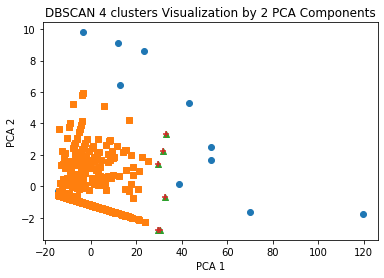

<Figure size 1080x1080 with 0 Axes>

In [ ]:
# 군집화 결과
import numpy as np
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(x)

x['pca_x'] = pca_transformed[:,0]
x['pca_y'] = pca_transformed[:,1]
# print(x)

maker0_ind = x[x['CLusterDBScan']==0].index
maker1_ind = x[x['CLusterDBScan']==1].index
maker2_ind = x[x['CLusterDBScan']==2].index
maker3_ind = x[x['CLusterDBScan']==3].index

plt.scatter(x=x.loc[maker0_ind,'pca_x'], y=x.loc[maker0_ind, 'pca_y'], marker='o')
plt.scatter(x=x.loc[maker1_ind,'pca_x'], y=x.loc[maker1_ind, 'pca_y'], marker='s')
plt.scatter(x=x.loc[maker2_ind,'pca_x'], y=x.loc[maker2_ind, 'pca_y'], marker='^')
plt.scatter(x=x.loc[maker2_ind,'pca_x'], y=x.loc[maker2_ind, 'pca_y'], marker='+')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('DBSCAN 4 clusters Visualization by 2 PCA Components')
plt.figure(figsize = (15,15))
plt.show()

## 실루엣 계수 0.6856 ~~~

In [ ]:
from sklearn import metrics 
from sklearn.metrics.cluster import silhouette_score
dbscan.__class__.__name__, silhouette_score(scaled_x, cluster_dbscan)

('DBSCAN', 0.6585020950749177)

In [ ]:
x

,기초생활수급자 인원_비율,65세 이상 인구 수_비율,우체국 수_비율,ATM 수_비율,CLusterDBScan
0,0.013375,0.184655,1.626016,13.008130,1
1,0.014834,0.227207,1.342282,2.684564,1
2,0.015225,0.181994,0.440529,2.202643,1
3,0.007472,0.186518,0.000000,0.450958,1
4,0.018599,0.167987,0.000000,5.555556,1
...,...,...,...,...,...
419,0.018645,0.171841,0.000000,1.960784,1
420,0.015220,0.174306,0.636943,8.280255,1
421,0.041175,0.170891,0.460829,3.225806,1
422,0.060275,0.158318,0.357143,1.785714,1


In [ ]:
x.CLusterDBScan.unique()

array([1, 2, 0, 3])

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = "/content/drive/MyDrive/팜경진대회_개인/Malgun Gothic.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52488 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54876 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backen

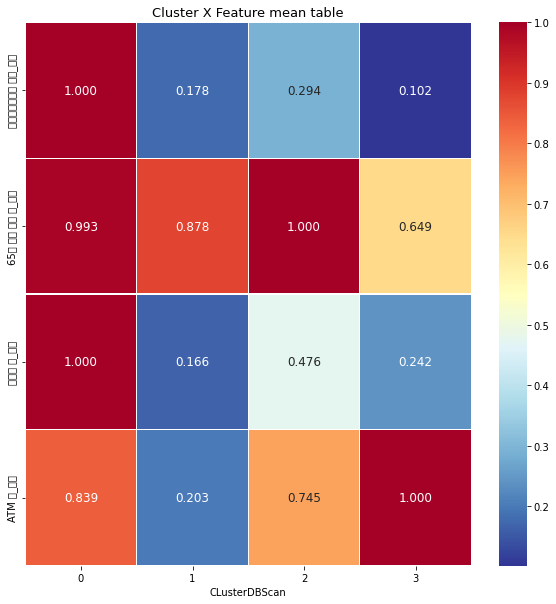

In [ ]:
import seaborn as sns

temp = x.groupby(['CLusterDBScan']).mean()
cluster_mean = temp.transpose()

mean_table = cluster_mean.div(cluster_mean.max(axis=1), axis=0)
# 히트맵으로 그리기
plt.figure(figsize = (10,10))    # 히트맵 사이즈 설정
annot_kws= {'fontsize':12}    # 히트맵 폰트 사이즈 설정
sns.heatmap(mean_table,     # 히트맵 그릴 데이터셋
			annot=True,     # 레이블 표시 여부
            fmt='.3f',     # 레이블 표시 형식 (소숫점 3째자리까지)
            linewidths = 0.1,     # 히트맵 선 두께
            annot_kws = annot_kws,     # 아까 설정한 폰트 사이즈 적용
            cmap = 'RdYlBu_r')    # 컬러맵 설정
plt.title('Cluster X Feature mean table', fontsize=13)
plt.show()

In [ ]:
x.groupby('CLusterDBScan').sum()

,기초생활수급자 인원_비율,65세 이상 인구 수_비율,우체국 수_비율,ATM 수_비율
CLusterDBScan,,,,
0,2.338591,2.068788,27.978094,229.512986
1,15.322422,67.218275,170.076137,2043.928285
2,0.375292,1.136720,7.258654,111.125837
3,0.065015,0.369011,1.846282,74.587482


In [ ]:
# 차원축소
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
pca = PCA(2)
data_x = pca.fit_transform(x)

In [ ]:
# 군집화 결과
centers = np.array(model.cluster_centers_)
model = KMeans(n_clusters = 5, init = "k-means++")
# label = model.fit_predict(data)
label = result_list
plt.figure(figsize=(10,10))
uniq = np.unique(label)
for i in uniq:
    plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
#This is done to find the centroid for each clusters.
plt.legend()
plt.show()

In [ ]:
result_list = x['CLusterDBScan']

In [ ]:
df['Cluster'] = result_list
df.drop(['CLusterDBScan'], axis=1, inplace=True)

In [ ]:
df

,자치구,행정동,인구 합계,면적(km^2),기초생활수급자 인원,65세 이상 인구 수,단장기 외국인 체류자 수,종사자수,우체국,편의점 수,약국 24시간,ATM 수,응급실 수,은행 수_합계,기초생활수급자 인원_비율,65세 이상 인구 수_비율,단장기 외국인 체류자 수_비율,우체국 수_비율,편의점 수_비율,약국 24시간_비율,ATM 수_비율,응급실 수_비율,은행 수_합계_비율,Cluster
0,종로구,사직동,9645,1.23,129,1781,1088.668800,47522,2,30,0,16,0,24,0.013375,0.184655,0.112874,1.626016,24.390244,0.0,13.008130,0.000000,19.512195,1
1,종로구,삼청동,2764,1.49,41,628,237.613325,4601,2,7,0,4,0,5,0.014834,0.227207,0.085967,1.342282,4.697987,0.0,2.684564,0.000000,3.355705,1
2,종로구,부암동,9852,2.27,150,1793,536.089583,3454,1,10,0,5,0,2,0.015225,0.181994,0.054414,0.440529,4.405286,0.0,2.202643,0.000000,0.881057,1
3,종로구,평창동,18336,8.87,137,3420,539.225137,3447,0,15,0,4,0,3,0.007472,0.186518,0.029408,0.000000,1.691094,0.0,0.450958,0.000000,0.338219,1
4,종로구,무악동,8334,0.36,155,1400,95.182733,1644,0,4,0,2,1,2,0.018599,0.167987,0.011421,0.000000,11.111111,0.0,5.555556,2.777778,5.555556,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,강동구,암사1동,34916,1.02,651,6000,456.630092,5646,0,32,0,2,0,2,0.018645,0.171841,0.013078,0.000000,31.372549,0.0,1.960784,0.000000,1.960784,1
420,강동구,천호2동,33969,1.57,517,5921,1775.944883,14208,1,50,0,13,0,3,0.015220,0.174306,0.052281,0.636943,31.847134,0.0,8.280255,0.000000,1.910828,1
421,강동구,길동,46047,2.17,1896,7869,970.269800,21237,1,60,0,7,1,9,0.041175,0.170891,0.021071,0.460829,27.649770,0.0,3.225806,0.460829,4.147465,1
422,강동구,강일동,32700,2.80,1971,5177,483.762183,17586,1,30,0,5,0,2,0.060275,0.158318,0.014794,0.357143,10.714286,0.0,1.785714,0.000000,0.714286,1


In [ ]:
# 클러스터에 해당하는 행정동 출력
dong0 = []
dong1 = []
dong2 = []
dong3 = []

for i in range(len(x)):
    if df.iloc[i]['Cluster']==0:
        dong0.append(df.iloc[i]['행정동'])
    elif df.iloc[i]['Cluster']==1:
        dong1.append(df.iloc[i]['행정동'])
    elif df.iloc[i]['Cluster']==2:
        dong2.append(df.iloc[i]['행정동'])
    elif df.iloc[i]['Cluster']==3:
        dong3.append(df.iloc[i]['행정동'])

In [ ]:
dong0

['숭인1동',
 '회현동',
 '명동',
 '을지로동',
 '신당동',
 '용신동',
 '삼선동',
 '신촌동',
 '구로3동',
 '구로4동',
 '둔촌1동']

In [ ]:
len(dong1)

404

In [ ]:
dong1

['사직동',
 '삼청동',
 '부암동',
 '평창동',
 '무악동',
 '교남동',
 '가회동',
 '종로5.6가동',
 '창신1동',
 '창신2동',
 '창신3동',
 '숭인2동',
 '청운효자동',
 '혜화동',
 '필동',
 '장충동',
 '신당5동',
 '중림동',
 '다산동',
 '청구동',
 '동화동',
 '후암동',
 '용산2가동',
 '남영동',
 '원효로2동',
 '효창동',
 '용문동',
 '이촌1동',
 '이촌2동',
 '이태원1동',
 '이태원2동',
 '서빙고동',
 '보광동',
 '청파동',
 '원효로1동',
 '한강로동',
 '한남동',
 '왕십리2동',
 '마장동',
 '행당1동',
 '행당2동',
 '응봉동',
 '금호1가동',
 '금호4가동',
 '성수1가1동',
 '성수1가2동',
 '성수2가1동',
 '성수2가3동',
 '송정동',
 '용답동',
 '왕십리도선동',
 '금호2.3가동',
 '옥수동',
 '화양동',
 '군자동',
 '중곡1동',
 '중곡2동',
 '중곡3동',
 '중곡4동',
 '능동',
 '구의1동',
 '구의2동',
 '구의3동',
 '광장동',
 '자양1동',
 '자양2동',
 '자양3동',
 '자양4동',
 '회기동',
 '휘경1동',
 '휘경2동',
 '청량리동',
 '제기동',
 '전농1동',
 '전농2동',
 '답십리2동',
 '장안1동',
 '장안2동',
 '이문1동',
 '이문2동',
 '답십리1동',
 '면목2동',
 '면목4동',
 '면목5동',
 '면목7동',
 '상봉1동',
 '상봉2동',
 '중화1동',
 '중화2동',
 '묵1동',
 '묵2동',
 '망우3동',
 '신내1동',
 '신내2동',
 '면목본동',
 '면목3.8동',
 '망우본동',
 '돈암1동',
 '돈암2동',
 '안암동',
 '보문동',
 '정릉1동',
 '정릉2동',
 '정릉3동',
 '정릉4동',
 '길음1동',
 '길음2동',
 '월곡1동',
 '월곡2동',
 '장위1동',
 '장위2동',
 '장위3동',
 

In [ ]:
dong2

['종로1.2.3.4가동', '이화동', '황학동', '약수동', '사근동', '가양3동']

In [ ]:
dong3

['소공동', '광희동', '가산동']

In [ ]:
# 군집별 특성 파악
c1=[]
c2=[]
c3=[]
c4=[]
c5=[]
c6=[]
c7=[]
c8=[]
c9=[]
c10=[]
df_check = pd.DataFrame()


for i in range(4):
    c1.append(df[df['Cluster']==i]['종사자수'].mean())
    c2.append(df[df['Cluster']==i]['기초생활수급자 인원_비율'].mean())
    c3.append(df[df['Cluster']==i]['65세 이상 인구 수_비율'].mean())
    c4.append(df[df['Cluster']==i]['단장기 외국인 체류자 수_비율'].mean())
    c5.append(df[df['Cluster']==i]['우체국 수_비율'].mean())
    c6.append(df[df['Cluster']==i]['편의점 수_비율'].mean())
    c7.append(df[df['Cluster']==i]['약국 24시간_비율'].mean())
    c8.append(df[df['Cluster']==i]['ATM 수_비율'].mean())
    c9.append(df[df['Cluster']==i]['응급실 수_비율'].mean())
    c10.append(df[df['Cluster']==i]['은행 수_합계_비율'].mean())

df_check['종사자수']=c1
df_check['기초생활수급자 인원_비율']=c2
df_check['65세 이상 인구 수_비율']=c3
df_check['단장기 외국인 체류자 수_비율']=c4
df_check['우체국 수_비율']=c5
df_check['편의점 수_비율']=c6
df_check['약국 24시간_비율']=c7
df_check['ATM 수_비율']=c8
df_check['응급실 수_비율']=c9
df_check['은행 수_합계_비율']=c10
df_check

,종사자수,기초생활수급자 인원_비율,65세 이상 인구 수_비율,단장기 외국인 체류자 수_비율,우체국 수_비율,편의점 수_비율,약국 24시간_비율,ATM 수_비율,응급실 수_비율,은행 수_합계_비율
0,36019.818182,0.212599,0.188072,0.358600,2.543463,46.466426,0.284896,20.864817,0.186081,14.238679
1,10904.272277,0.037927,0.166382,0.049573,0.420981,22.439682,0.100351,5.059228,0.130079,4.443978
2,25662.000000,0.062549,0.189453,0.134394,1.209776,30.412662,0.000000,18.520973,0.365190,9.175243
3,90493.666667,0.021672,0.123004,0.620773,0.615427,53.844446,0.000000,24.862494,0.450450,23.509788


In [ ]:
print(len(dong0), len(dong1), len(dong2), len(dong3))

11 404 6 3


In [ ]:
print(dong1)

['사직동', '삼청동', '부암동', '평창동', '무악동', '교남동', '가회동', '종로5.6가동', '창신1동', '창신2동', '창신3동', '숭인2동', '청운효자동', '혜화동', '필동', '장충동', '신당5동', '중림동', '다산동', '청구동', '동화동', '후암동', '용산2가동', '남영동', '원효로2동', '효창동', '용문동', '이촌1동', '이촌2동', '이태원1동', '이태원2동', '서빙고동', '보광동', '청파동', '원효로1동', '한강로동', '한남동', '왕십리2동', '마장동', '행당1동', '행당2동', '응봉동', '금호1가동', '금호4가동', '성수1가1동', '성수1가2동', '성수2가1동', '성수2가3동', '송정동', '용답동', '왕십리도선동', '금호2.3가동', '옥수동', '화양동', '군자동', '중곡1동', '중곡2동', '중곡3동', '중곡4동', '능동', '구의1동', '구의2동', '구의3동', '광장동', '자양1동', '자양2동', '자양3동', '자양4동', '회기동', '휘경1동', '휘경2동', '청량리동', '제기동', '전농1동', '전농2동', '답십리2동', '장안1동', '장안2동', '이문1동', '이문2동', '답십리1동', '면목2동', '면목4동', '면목5동', '면목7동', '상봉1동', '상봉2동', '중화1동', '중화2동', '묵1동', '묵2동', '망우3동', '신내1동', '신내2동', '면목본동', '면목3.8동', '망우본동', '돈암1동', '돈암2동', '안암동', '보문동', '정릉1동', '정릉2동', '정릉3동', '정릉4동', '길음1동', '길음2동', '월곡1동', '월곡2동', '장위1동', '장위2동', '장위3동', '성북동', '동선동', '종암동', '석관동', '번1동', '번2동', '번3동', '수유1동', '수유2동', '수유3동', '삼양동', '미아동', '송중동', '송천동', '삼각산동', '우이